## Домашнее задание (Кросс-валидация)

Для выполнения домашнего задания необходимо взять boston house-prices datase (sklearn.datasets.load_boston) и сделать тоже самое для задачи регрессии (попробовать разные алгоритмы, поподбирать параметры, вывести итоговое качество). 

In [15]:
import pandas as pd
import numpy as np


from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV

from sklearn.linear_model import LinearRegression


from sklearn import metrics
from sklearn.metrics import mean_squared_error, explained_variance_score, mean_absolute_error


import matplotlib.pyplot as plt
%matplotlib inline


from jupyterthemes import jtplot
jtplot.style(figsize=(12.0, 8.0))


import warnings
warnings.simplefilter('ignore')

### Реализация

### Загрузим данные

In [2]:
boston = load_boston()

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [4]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:
X = boston.data

In [6]:
y = boston.target

In [7]:
df = pd.DataFrame(X, columns = boston.feature_names)

In [9]:
df.shape[0] == len(X)

True

### Кросс - валидация

- построим модель (линейная регрессия)
- выполним кросс-валидацию (несколько эксперементов CV)
- посмотрим разные алгоритмы (LinearRegression, RandomForestRegressor)
- посмотрим важность признаков
- подберем оптимальные параметры

### LinearRegression .......

##### - Эксперимент 1:

разобьем наш набор данных на трейн и тест, зафитим модель, предскажем y_pred, посчитаем MSE и посмотрим как отклоняется наше предсказаный таргет от правильных ответов

In [10]:
model = LinearRegression(fit_intercept=True)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=5779)

In [12]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
price_pred_train = model.predict(X_train)
price_pred_test = model.predict(X_test)
lin_mse_TR = mean_squared_error(y_train, price_pred_train)
lin_mse_TS = mean_squared_error(y_test, price_pred_test)


print('MSE на train: {:.4f}'.format(lin_mse_TR))
print('MSE на test: {:.4f}'.format(lin_mse_TS))

MSE на train: 21.1849
MSE на test: 25.2711


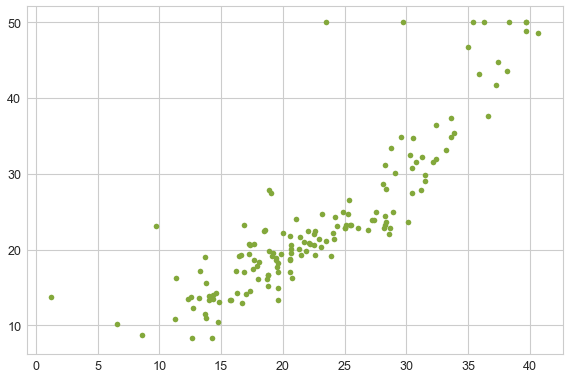

In [16]:
y_pred = model.predict(X_test)
plt.plot(y_pred, y_test, 'go')

In [17]:
mean_squared_error(y_test, y_pred)

25.27107263704599

In [18]:
#затестим сходимость результата
((y_test - y_pred)**2).mean()

25.27107263704599

##### Вывод (Эксперимнет 1):

`MSE` на наборе данных без выполнения кросс-валидации на тесте соствил `25.27`

##### - Эксперимент 2:

в цикле будем разбивать выборку на трейн и тест, фитить модель и считать MSE для каждой итерации (выполним kFold -20)

In [19]:
cnt_ts = []
cnt_tr = []

for i in range(1, 21):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=i)
    lin_reg = LinearRegression()
    lin_reg.fit(X_train, y_train)
    
    train_pred = lin_reg.predict(X_train)
    y_pred = lin_reg.predict(X_test)
   
    f = mean_squared_error(y_train, train_pred)
    r = mean_squared_error(y_test, y_pred)
    cnt_ts.append(r)
    cnt_tr.append(f)

    print('Номер эксперимента (итерации разбиения выборки): {:.0f}'.format(i))
    print('Значение MSE на трейне: {:.4f}'.format(f)) 
    print('Значение MSE на тесте: {:.4f}'.format(r)) 
    print('-----------------------------------------------------')
    

print('Среднее значение по 20 разбивкам CV на трейне: {:.2f}'.format(np.mean(cnt_tr)))    
print('Среднее значение по 20 разбивкам CV на тесте: {:.2f}'.format(np.mean(cnt_ts)))

Номер эксперимента (итерации разбиения выборки): 1
Значение MSE на трейне: 23.5176
Значение MSE на тесте: 19.8296
-----------------------------------------------------
Номер эксперимента (итерации разбиения выборки): 2
Значение MSE на трейне: 22.0657
Значение MSE на тесте: 23.0572
-----------------------------------------------------
Номер эксперимента (итерации разбиения выборки): 3
Значение MSE на трейне: 22.4197
Значение MSE на тесте: 22.4398
-----------------------------------------------------
Номер эксперимента (итерации разбиения выборки): 4
Значение MSE на трейне: 19.0737
Значение MSE на тесте: 30.0682
-----------------------------------------------------
Номер эксперимента (итерации разбиения выборки): 5
Значение MSE на трейне: 19.0715
Значение MSE на тесте: 30.7032
-----------------------------------------------------
Номер эксперимента (итерации разбиения выборки): 6
Значение MSE на трейне: 19.4836
Значение MSE на тесте: 28.3334
----------------------------------------------

##### Вывод (Эксперимент 2):

`MSE` на наборе данных с кросс-валидацией на тесте соствил `25.12`

##### - Эксперимент 3:

выполним кросвалидацию с с помощью готовой библиотеки cross_val_predict (выполним kFold -20)

In [20]:
print('Среднее значение CV на трейне: {:.4f}'.format(np.mean(cross_val_predict(lin_reg, X_train, y_train, cv=20))))
print('Среднее значение CV на тесте: {:.4f}'.format(np.mean(cross_val_predict(lin_reg, X_test, y_test, cv=20))))

Среднее значение CV на трейне: 22.6640
Среднее значение CV на тесте: 22.0692


Вывод (Эксперимент 3):

`MSE` на наборе данных с кросс-валидацией на тесте соствил `22.06`

### RandomForestRegressor .......

In [21]:
from sklearn.ensemble import RandomForestRegressor

- посмотрим на важность признаков и на результат на тесте

In [22]:
regr = RandomForestRegressor(max_depth=None, criterion='mse', random_state=0, n_estimators=100)
regr.fit(X_train, y_train)


print(regr.feature_importances_)

print('------------------------------------------------------------------------------')
print(df.columns)
print(regr.predict([[0., 0.,0.,0.,0.00111388, 0.73712938,0.,0.,0.,0.,0.,0.,0.26175673]]))

print('------------------------------------------------------------------------------')
print(np.mean(regr.predict(X_test)))

[3.35695674e-02 1.65220112e-03 6.69702998e-03 5.08722702e-04
 1.92806824e-02 6.02260921e-01 1.06264630e-02 4.64371688e-02
 5.31452569e-03 1.34602747e-02 1.48583945e-02 1.24408993e-02
 2.32893149e-01]
------------------------------------------------------------------------------
Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')
[38.086]
------------------------------------------------------------------------------
22.934361842105265


##### Подберем оптимальное количество деревьев в лесу (сделаю это вручную)

In [23]:
cnt_tr = []
cnt_w = []

for w in range(1, 200, 10):
    
    regr = RandomForestRegressor(max_depth=None, criterion='mse', random_state=0, n_estimators=w)
    regr.fit(X_train, y_train)
    
    h = np.mean(regr.predict(X_test))
    cnt_tr.append(h)
    cnt_w.append(w)


- посмотрим на зависимость MSE от кол-ва деревьев 

Text(0,0.5,'MSE value')

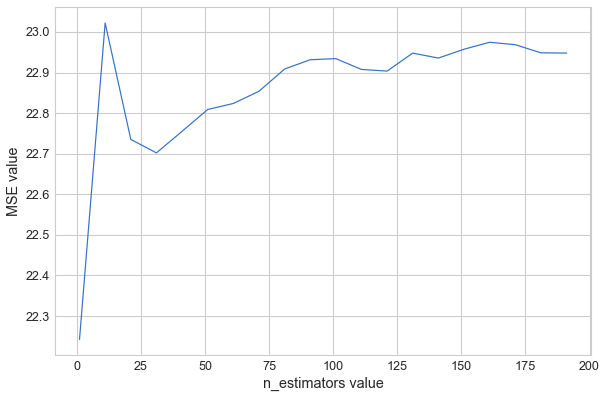

In [24]:
plt.plot(cnt_w, cnt_tr, 'b')
plt.xlabel('n_estimators value')
plt.ylabel('MSE value')

In [25]:
cnt_train = []
cnt_t = []

for t in range(1, 20, 1):
    
    regr = RandomForestRegressor(max_depth=t, criterion='mse', random_state=0, n_estimators=31)
    regr.fit(X_train, y_train)
    
    h = np.mean(regr.predict(X_test))
    cnt_train.append(h)
    cnt_t.append(t)
    

Text(0,0.5,'MSE value')

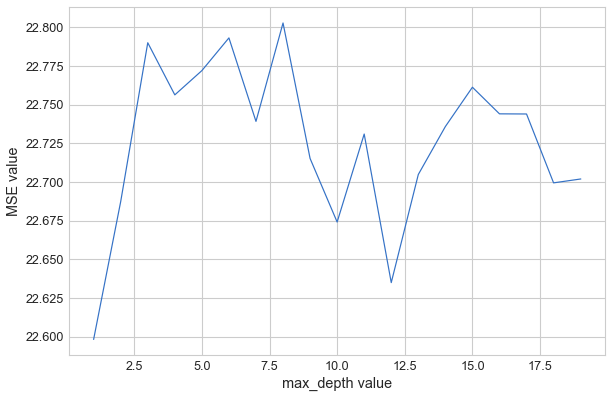

In [26]:
plt.plot(cnt_t, cnt_train, 'b')
plt.xlabel('max_depth value')
plt.ylabel('MSE value')

In [27]:
regr_mode = RandomForestRegressor(max_depth=12, criterion='mse', random_state=0, n_estimators=31)

In [28]:
regr_mode.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=31, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [29]:
print('Значение MSE на тесте при оптимальных параметрах модели: {:.4f}'.format(np.mean(regr_mode.predict(X_test))))

Значение MSE на тесте при оптимальных параметрах модели: 22.6350


##### Вывод :

Максимальное значение `MSE` на тестовой выборке составило `22.63`, данное значение полученно на оптимальных параметрах, если использовать параметры по дефолту, то в таком случае значение mse получается немного выше `22.93`